## Background

Environment and its changes are the most complex system. It is unarguably accepted that the temperature changes are greately affected by various environmental factors. Many of them are positively related to the  change, whereas, some have negative correlation. In this assesment task, you will analyse relationship among various environmental factors, which affect temperature.

## The dataset

**Dataset file name:** weather_dataset.csv

**Dataset description:** The dataset contains total 10 features. Each row contains an hourly record of weather status and the data was recorded for the time period between 2006 and 2016.

**Features and labels:** 

1.   recording_date_time (date_time): Date and time the data was recorded
2.   precip_type (string): Precipitation status, blank (no value) indicates unknown status
3.   temperature (float): Temperature in degree Celsius
4.   apparent_temperature (float): Feel like temperature in degree Celsius
5.   humidity (float): Percentage amount of water vapour in the air 
6.   wind_speed (float): Speed of the wind in km per hour
7.   wind_bearing (int): The direction of wind in degree in geo-polar co-ordinate. Value 0 means perfect east, 90 means perfect north, 180 and 270 means west and south respectively.
8.   visibility (float): Distance in km that is visible in naked eyes.
9.   cloud_cover (float): The fraction of the sky obscured by clouds. The value is 1 if the observed area is fully cloudy, 0 if no clouds and other fractional value indicates the portion of the area covered by clouds.
10.   pressure (float): Air pressure or atmospheric in milibars


## **Part 1: Linear Regression:**


1.   Load the dataset and split the data for training and testing - consider the data of last 2 years (2015 and 2016) for testing. Now exclude recording_date_time column from both training and test sets. Display the shape of training and test sets. **(3 marks)**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns

source_dataset = pd.read_csv("weather_dataset.csv")

source_dataset['recording_date_time'] = source_dataset['recording_date_time'].str[:23].astype('datetime64[ns]')

source_dataset['precip_type'] = source_dataset['precip_type'].replace(['rain','snow'],[0,1])

training_dataset = source_dataset[source_dataset['recording_date_time'] <= '2014-12-31']
del training_dataset['recording_date_time']
test_dataset = source_dataset[source_dataset['recording_date_time'] >= '2014-12-31']
del test_dataset['recording_date_time']
print("The shape of the training_dataset is:", training_dataset.shape)
print("The shape of the test_dataset is:", test_dataset.shape)

The shape of the training_dataset is: (78886, 9)
The shape of the test_dataset is: (17568, 9)


2.  Consider the 'temperature' as the target. List the insignificant features for predicting temperature, if any. Explain your findings.

In [3]:
temp_corr = pd.DataFrame(training_dataset.corr()['temperature'][:])
#Assumption that an insignificant feature is defined as one with less than an ABSOLUTE VALUE of correlation than 0.5
InsignificantFeatures = (temp_corr[abs(temp_corr['temperature']) < 0.5]).rename(columns={'temperature': 'feature corr'})

print("The feature displayed below are deemed insignificant in predicting temperature, as the absolute correlation between")
print("'temperature' and the given feature is less than 0.5, which indicates a low/moderate correlation")
print("----------")
print(InsignificantFeatures)

The feature displayed below are deemed insignificant in predicting temperature, as the absolute correlation between
'temperature' and the given feature is less than 0.5, which indicates a low/moderate correlation
----------
              feature corr
wind_speed        0.010769
wind_bearing      0.029497
visibility        0.370841
pressure         -0.013990


3.  Now create a linear model considering the 'temperature' as the target variable and other columns as features (you can optionally remove non-contributing features). Show the test performance (as Mean Absolute Error, MAE) of the model.

The Mean Absolute Error of the model is: 0.8400581618025927
Individual linear regressions to prediction features shown below:


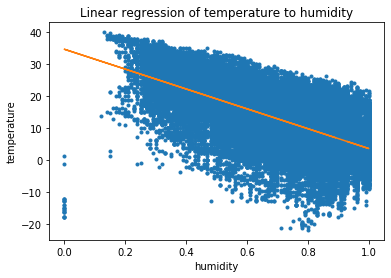

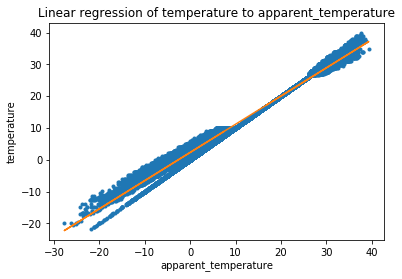

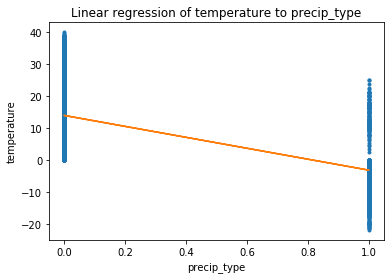

In [4]:
x = training_dataset[['apparent_temperature', 'humidity', 'precip_type']]
x1 = training_dataset[['humidity']]
x2 = training_dataset[['apparent_temperature']]
x6 = training_dataset[['precip_type']]
y = training_dataset[['temperature']]
lm = linear_model.LinearRegression()
model = lm.fit(x, y)
y_pred = lm.predict(x)

print("The Mean Absolute Error of the model is:", mean_absolute_error(y, y_pred))
#####################################
print("Individual linear regressions to prediction features shown below:")
lm1 = linear_model.LinearRegression()
model1 = lm1.fit(x1, y)
y_pred1 = lm1.predict(x1)
plt.plot(x1, y, '.', x1, y_pred1, '-')
plt.xlabel('humidity')
plt.ylabel('temperature')
plt.title('Linear regression of temperature to humidity')
plt.show()
#####################################
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(x2, y)
y_pred2 = lm2.predict(x2)
plt.plot(x2, y, '.', x2, y_pred2, '-')
plt.xlabel('apparent_temperature')
plt.ylabel('temperature')
plt.title('Linear regression of temperature to apparent_temperature')
plt.show()
#####################################
lm3 = linear_model.LinearRegression()
model6 = lm3.fit(x6, y)
y_pred6 = lm3.predict(x6)
plt.plot(x6, y, '.', x6, y_pred6, '-')
plt.xlabel('precip_type')
plt.ylabel('temperature')
plt.title('Linear regression of temperature to precip_type')
plt.show()

4.   Find the feature which shows maximum correlation with "pressure". Create a linear regression model to predict temperature using these two features ('pressure' and the one which shows maximum correlation). Compare the performance of this simplified model with the model developed in the previous question (Q-3). Explain the performance variation, if any.

Feature with maximum correlation: visibility    0.048895
Name: pressure, dtype: float64
The Mean Absolute Error of the model is: 7.230482720005235

Explanation:
The performance of features 'visibility' and 'pressure' as predictors of temperature is meaningfully worse than features
'apparent_temperature' and 'humidity'.
* Pressure has a very low (almost no) correlation with temperature, as evidenced in Q1.
* Visibility does have a positive correlation with temperature (refer to Q1), however the values are more broadly dispersed
which naturally increases the error returned.

Individual linear regressions to prediction features shown below:


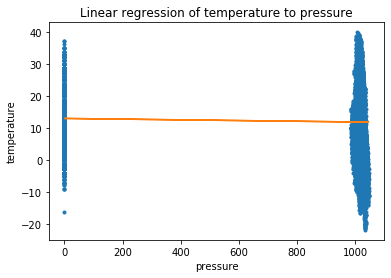

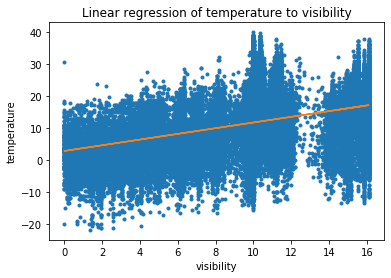

In [5]:
pressure_corr = pd.DataFrame(training_dataset.corr()['pressure'][:]).drop(['pressure'])
print('\033[1m' + '\033[4m' + "Feature with maximum correlation:" + '\033[0m', abs(pressure_corr['pressure']).nlargest(1))
##########################
x3 = training_dataset[['pressure', 'visibility']]
x4 = training_dataset[['pressure']]
x5 = training_dataset[['visibility']]
y = training_dataset[['temperature']]
lm4 = linear_model.LinearRegression()
model3 = lm4.fit(x3, y)
y_pred3 = lm4.predict(x3)
#####################################print('\033[1m' + '\033[4m' + "Findings:" + '\033[0m')
print('\033[1m' + '\033[4m' + "The Mean Absolute Error of the model is:"  + '\033[0m', mean_absolute_error(y, y_pred3))
#####################################
print("")
print('\033[1m' + '\033[4m' + "Explanation:" + '\033[0m')
print("The performance of features 'visibility' and 'pressure' as predictors of temperature is meaningfully worse than features")
print("'apparent_temperature' and 'humidity'.")
print("* Pressure has a very low (almost no) correlation with temperature, as evidenced in Q1.")
print("* Visibility does have a positive correlation with temperature (refer to Q1), however the values are more broadly dispersed")
print("which naturally increases the error returned.")
print("")
print("Individual linear regressions to prediction features shown below:")
lm5 = linear_model.LinearRegression()
model4 = lm5.fit(x4, y)
y_pred4 = lm5.predict(x4)
plt.plot(x4, y, '.', x4, y_pred4, '-')
plt.xlabel('pressure')
plt.ylabel('temperature')
plt.title('Linear regression of temperature to pressure')
plt.show()
#####################################
lm6 = linear_model.LinearRegression()
model5 = lm6.fit(x5, y)
y_pred5 = lm6.predict(x5)
plt.plot(x5, y, '.', x5, y_pred5, '-')
plt.xlabel('visibility')
plt.ylabel('temperature')
plt.title('Linear regression of temperature to visibility')
plt.show()

5. Apportion the complete dataset into training and test sets, with an 40-60 split.

  (a)  Train a linear regression model without considering overfitting scenario and report the test performance. 
  
  (b) Create an optimal regularised linear regression model and report the test performance.
  
  (c) Explain the reason behind the performance variation, if any.


In [6]:
features = source_dataset.drop(['recording_date_time', 'temperature'], axis=1)
target = source_dataset['temperature']
#Assumption of 40% training 60% testing per feedback in discussion forums.
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.6)
lm7 = linear_model.LinearRegression()
Q5_model = lm7.fit(x_train, y_train)
Q5_predictions = lm7.predict(x_test)
#Assumption that 'test performance' is on the basis of mean absolute error, the same as previous questions requirement.
print('\033[1m' + '\033[4m' + "Q5(a). The performance (Mean Absolute Error) of the model is:"  + '\033[0m', mean_absolute_error(Q5_predictions, y_test))
######################################################################
print("")
#Lasso regularisation
lasso = Lasso(normalize=True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring ='neg_mean_absolute_error', cv = 5)
lasso_regressor.fit(x_train, y_train)
#Ridge regularisation
ridge = Ridge(normalize=True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring ='neg_mean_absolute_error', cv = 5)
ridge_regressor.fit(x_train, y_train)
#######################################################################
lassolr = Lasso(alpha=0.0001, normalize=True)
lassolr.fit(x_train, y_train)
lassolr_pred = lassolr.predict(x_test)

print('\033[1m' + '\033[4m' + "Q5(b). The performance (Mean Absolute Error) of the optimal lin reg model using 'LASSO' regression is:"  + '\033[0m', mean_absolute_error(lassolr_pred, y_test))
print("")
print("Comparison of regularisers 'Lasso' and 'Ridge'")
print("'Lasso' optimal alpha (based on negative MAE):")
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
print("'Ridge' optimal alpha (based on negative MAE):")
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
# INSERT your answer in maximum five sentences.
print("")
print('\033[1m' + '\033[4m' + "Q5(c). Explanation of performance difference"  + '\033[0m')
print("")
print("There is performance variation between the linear model which didn't consider over-fitting and the")
print("LASSO model, in favour of the LASSO model. This is due to LASSO regression penalising features which")
print("don't contribute to the regression results; reducing their coefficient/weighting - potentially to zero.")
print("The result of this is a line which is less biased by features which do not meaningfully predict the line of best fit.")
print("")

Q5(a). The performance (Mean Absolute Error) of the model is: 0.7421864367974887

Q5(b). The performance (Mean Absolute Error) of the optimal lin reg model using 'LASSO' regression is: 0.7415810785356424

Comparison of regularisers 'Lasso' and 'Ridge'
'Lasso' optimal alpha (based on negative MAE):
{'alpha': 0.0001}
-0.74126535900413
'Ridge' optimal alpha (based on negative MAE):
{'alpha': 0.001}
-0.741655288797098

Q5(c). Explanation of performance difference

There is performance variation between the linear model which didn't consider over-fitting and the
LASSO model, in favour of the LASSO model. This is due to LASSO regression penalising features which
don't contribute to the regression results; reducing their coefficient/weighting - potentially to zero.
The result of this is a line which is less biased by features which do not meaningfully predict the line of best fit.



## **Part 2: Logistic Regression:** 


1.  Can the same target (temperature, mentioned in Part-1) be used for logistic regression? Why?

In [7]:
print("No, the feature 'temperature' cannot be appropriately used as a target for logistic regression.")
print("Logistic regression is used where the dependent variable is categorical/binary (like 'obese' vs. 'not obese')")
print("rather than continuous (like the many different possible temperatures.")

No, the feature 'temperature' cannot be appropriately used as a target for logistic regression.
Logistic regression is used where the dependent variable is categorical/binary (like 'obese' vs. 'not obese')
rather than continuous (like the many different possible temperatures.


2.  Split the dataset as 70-30% for training and testing. Create a logistic regression model to predict the 'precip_type'. Report the prediction accuracy of your model whether the "precip_type" is "rain" or not (use decision threshold of 0.45).



In [8]:
features2 = source_dataset.drop(['recording_date_time', 'precip_type'], axis=1)
target2 = source_dataset['precip_type']

X_train2,X_test2,y_train2,y_test2=train_test_split(features2,target2,test_size=0.3)
logreg2 = LogisticRegression(solver='liblinear')
logreg2.fit(X_train2,y_train2)

decision_threshold = 0.45
y_pred2 = np.where(logreg2.predict_proba(X_test2)[:,1] > decision_threshold, 1, 0)
accuracy = accuracy_score(y_pred2, y_test2)
print("The accuracy of the model with a decision threshold of 0.45 is:",metrics.accuracy_score(y_test2, y_pred2))

The accuracy of the model with a decision threshold of 0.45 is: 0.9858653580315179


 3.  Discuss the test performance using precision, recall and confusion matrix.

Precision is based on 'True Positive / (True Positive + False Positive)', which in this model equals:
3194  /  ( 3194 + 210 ) = 0.9383078730904818
Recall is based on 'True Positive / (True Positive + False Negative)', which in this model equals:
3194  /  ( 3194 + 199 ) = 0.941349837901562


Text(0.5, 15.0, 'Predicted label')

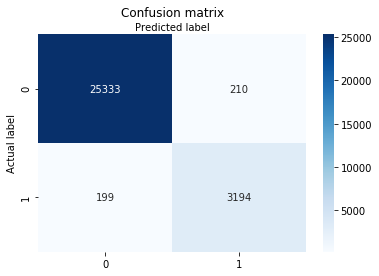

In [9]:
cnf_matrix = metrics.confusion_matrix(y_test2, y_pred2)
cnf_matrix

print("Precision is based on 'True Positive / (True Positive + False Positive)', which in this model equals:")
print(cnf_matrix[1][1], " / ", "(", cnf_matrix[1][1], "+", cnf_matrix[0][1], ")", "=", metrics.precision_score(y_test2, y_pred2))
print("Recall is based on 'True Positive / (True Positive + False Negative)', which in this model equals:")
print(cnf_matrix[1][1], " / ", "(", cnf_matrix[1][1], "+", cnf_matrix[1][0], ")", "=", metrics.recall_score(y_test2, y_pred2))
class_names=['Rain','Snow']
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), cmap="Blues", annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.plot()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### **Part 3: Objective function optimisation:** 

Let’s consider the line graphs shown below and answer the following questions [Hint: See weekly content 7.4-7.10],

<html>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(b)</html>

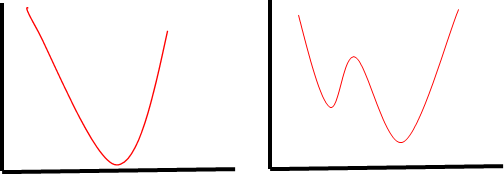





a.  Which of the above figures represents the convex objective function and why? 

b.  Which hyper-parameter can help to reach the convergence point and the impact of value selection?

c.  How can we find the global minima for the objective function shown in Figure-b?

In [10]:
print('\033[1m' + '\033[4m' + "Part 3(a):" + '\033[0m' + " Figure 'b' represents a convex objective function as it shows a single optimal (low point) solution")
print ('\033[1m' + '\033[4m' + "Part 3(b):" + '\033[0m' + " The hyper-parameter which helps reach convergence point and impact the value of selection is 'Gradient Descent'")
print('\033[1m' + '\033[4m' + "Part 3(c):" + '\033[0m' + " For the convex objective function shown, global minima can be 'found' by following the slopes between two points")
print("'going downward' until such a point in the curve where the slope between equals zero.")


Part 3(a): Figure 'b' represents a convex objective function as it shows a single optimal (low point) solution
Part 3(b): The hyper-parameter which helps reach convergence point and impact the value of selection is 'Gradient Descent'
Part 3(c): For the convex objective function shown, global minima can be 'found' by following the slopes between two points
'going downward' until such a point in the curve where the slope between equals zero.
